In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

# Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [50]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [51]:
df = pd.read_csv('parkinsons.data')

# EDA

In [52]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [54]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


1    147
0     48
Name: status, dtype: int64


Text(0.5, 1.0, 'Distribution of status')

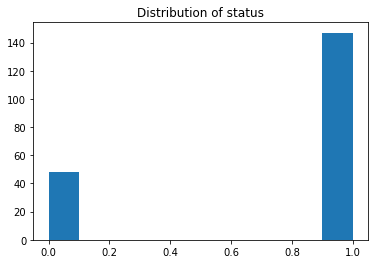

In [55]:
print(df.status.value_counts())
plt.hist(df.status)
plt.title('Distribution of status')

In [56]:
df.columns[1]

'MDVP:Fo(Hz)'

In [57]:
df.describe().columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


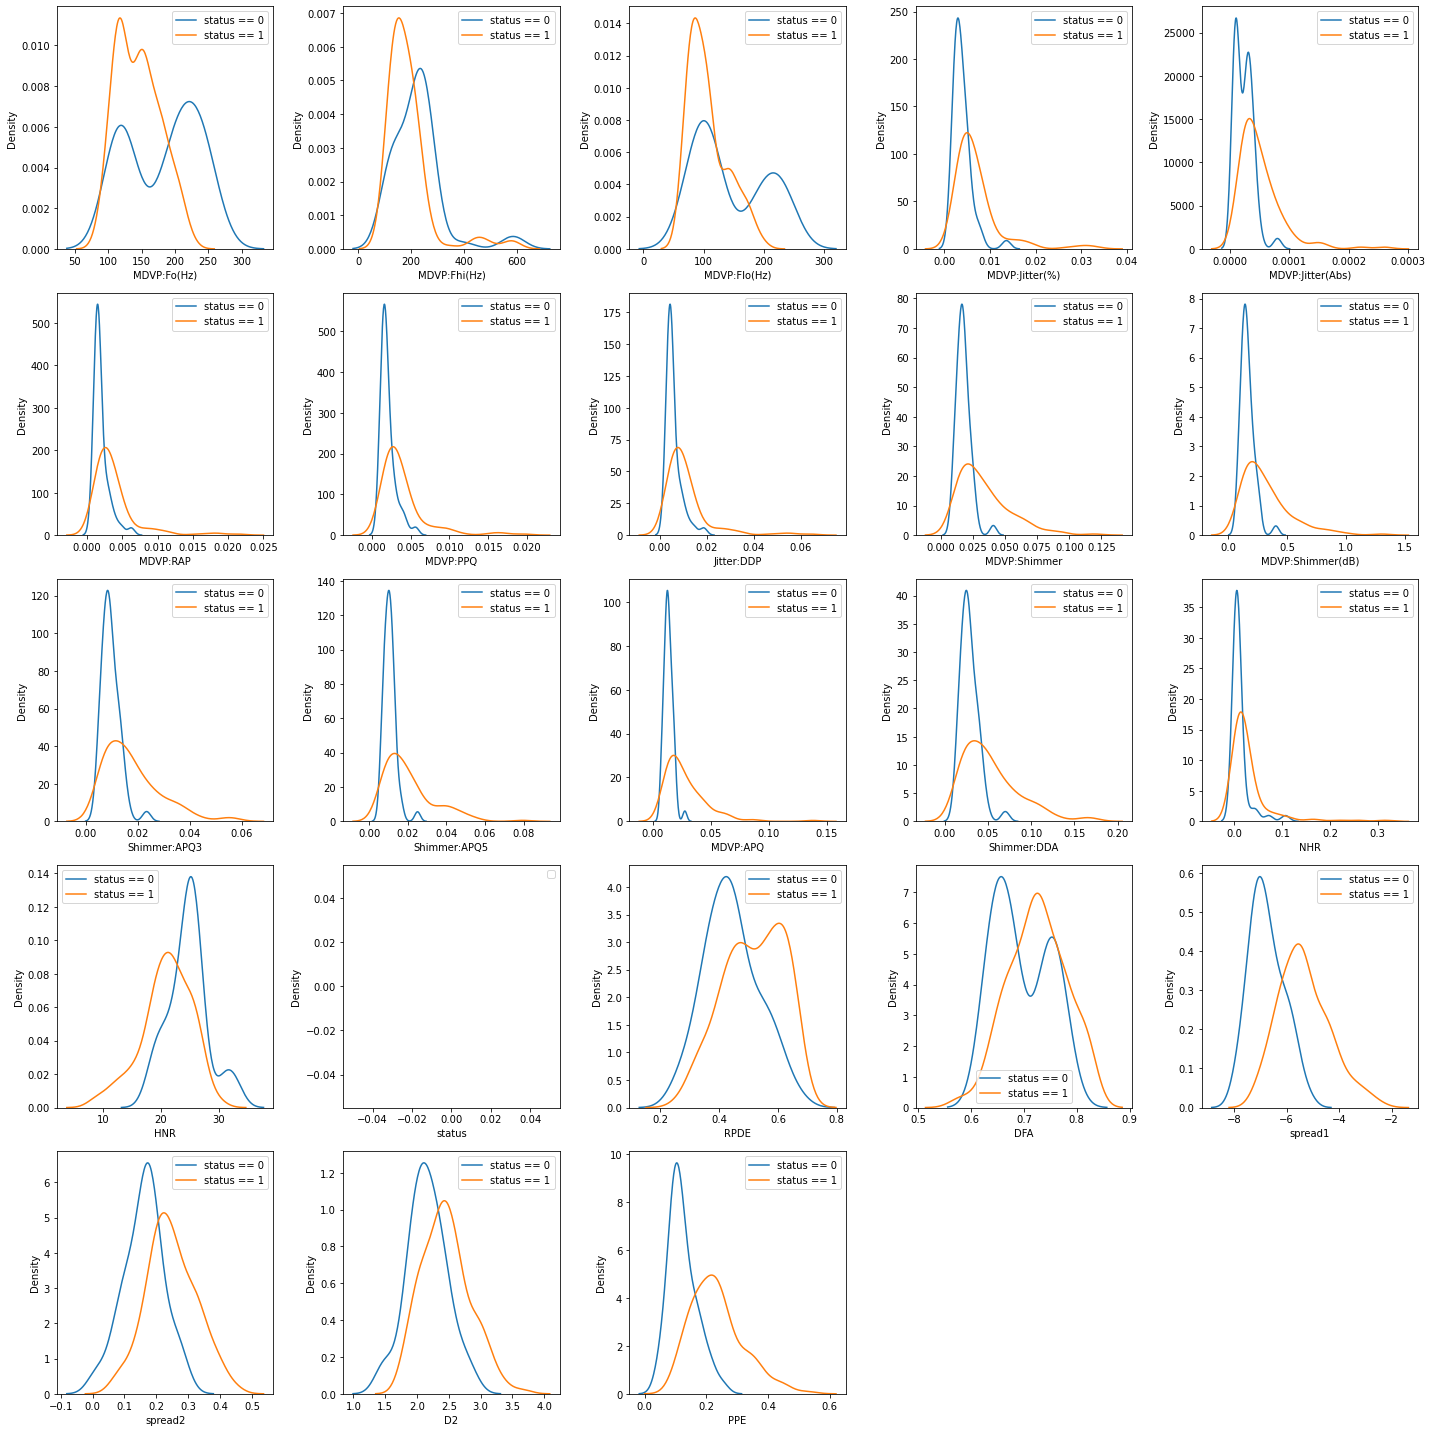

In [58]:
plt.figure(figsize=(20,20))
for i, feature in enumerate(df.describe().columns):
    plt.subplot(5,5,i+1)
    sns.kdeplot(x=df[df.status == 0][feature], label='status == 0', warn_singular=False)
    sns.kdeplot(x=df[df.status == 1][feature], label='status == 1', warn_singular=False)
    plt.legend()
    plt.tight_layout()

<AxesSubplot:>

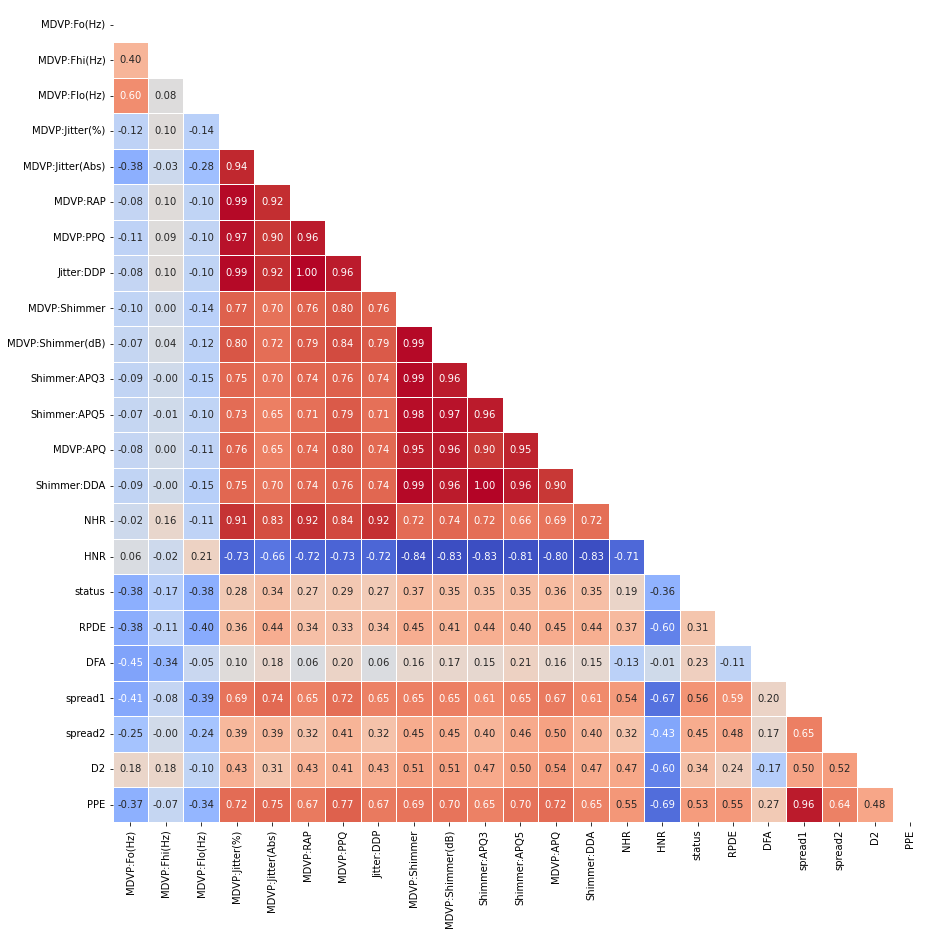

In [79]:
plt.figure(figsize=(15,15))
mask = np.triu(df.corr())
sns.heatmap(df.corr(),
        annot=True,
        fmt='.2f',
        cmap='coolwarm',
        square=True,
        mask=mask,
        linewidths=1,
        cbar=False)


# Machine Learning

## Baseline

In [133]:
def pipeline(drop_features=None):
    # Define X and y
    if drop_features==None:
        X = df.drop(['status', 'name'], axis=1)
        y = df.status
        column = X.columns
    else:
        X = df.drop(['status', 'name'], axis=1)
        X = X.drop(drop_features, axis=1)
        y = df.status
        column = X.columns

    # Scale
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)

    # Cross validation score
    model = XGBClassifier()
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(model, X, y, cv=10)
    print(f'Mean Scores: {scores.mean()}')
    print(f'Standard Deviation: {scores.std()}')

    # Feature importance dataframe
    model.fit(X,y)
    model.feature_importances_
    fi_df = pd.DataFrame({
        'Features': column,
        'feature_importance': model.feature_importances_
    })

    # Plot feature importance
    fi_df = fi_df.sort_values(by='feature_importance', ascending=True)
    fi_df.plot.barh(x='Features', y='feature_importance',figsize=(12,8))

Mean Scores: 0.8763157894736843
Standard Deviation: 0.07031783797835467


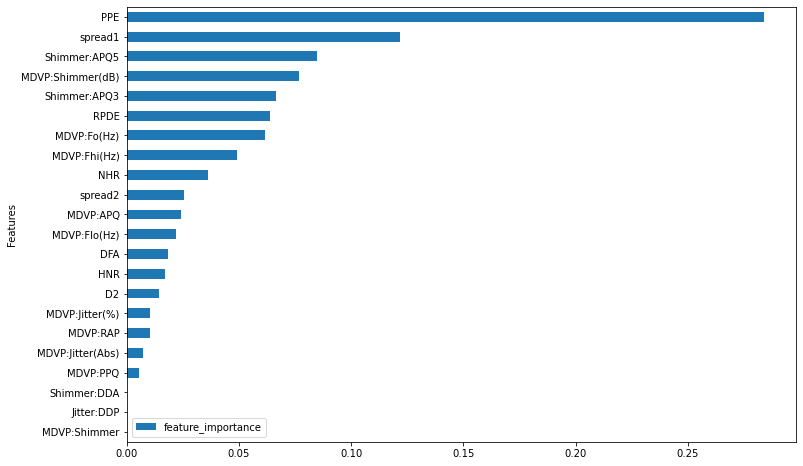

In [134]:
pipeline()

## Remove highly correlated features

In [141]:
# Set the threshold
threshold = 0.90
# Create correlation matrix
corr_matrix = df.drop(['status', 'name'], axis=1).corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Find index of feature columns with correlation greater than the threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print('There are %d columns to remove.' % (len(to_drop)))

There are 11 columns to remove.


Mean Scores: 0.8760526315789473
Standard Deviation: 0.08439494608806712


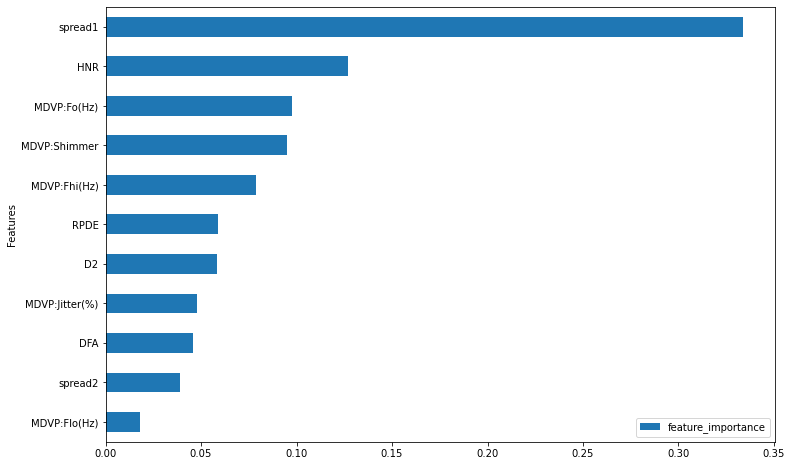

In [142]:
pipeline(to_drop)

We are able to remove 11 out of 24 features without significantly affect the performance of the model. It is hard to tell if the model is highly effective because the dataset is too small. It is probable that the model is overfitting or underfitting the data.